Score of the model with Pclass,male,Age,Parents/children,fare
accurracy:- 0.8049387418269536
precision:- 0.7692059748427673
recall:- 0.6966355260538376
f1:- 0.7302993762659424


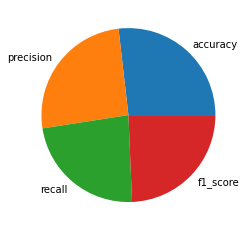

Score of the model with Pclass,male,age
accurracy:- 0.7936773947819462
precision:- 0.7462234283129805
recall:- 0.704565883816213
f1:- 0.724215340068878


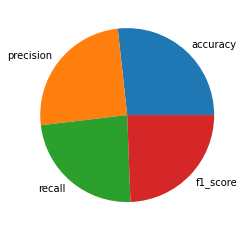

Score of the model with fare ,age
accurracy:- 0.6539008442836285
precision:- 0.6395693581780538
recall:- 0.22580042544831275
f1:- 0.3320709021800519


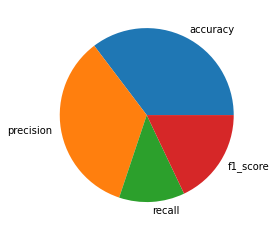

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.metrics import recall_score,f1_score,accuracy_score,precision_score
import matplotlib.pyplot as plt
kf = KFold(n_splits=5, shuffle=True)
def score_model(X,y,kf):
    
    acc_score =[]
    pre_score = []
    re_score = []
    f_score = []
    for train_index,test_index in kf.split(X):
        X_train ,X_test = X[train_index],X[test_index]
        y_train,y_test = y[train_index],y[test_index]
        model = LogisticRegression()
        model.fit(X,y)
        y_pred = model.predict(X_test)
        acc_score.append((accuracy_score(y_test,y_pred)))
        re_score.append((recall_score(y_test,y_pred)))
        pre_score.append((precision_score(y_test,y_pred)))
        f_score.append((f1_score(y_test,y_pred)))
    a = np.mean(acc_score)
    b = np.mean(pre_score)
    z = np.mean(re_score)
    w = np.mean(f_score)
    print(f"accurracy:- {a}")
    print(f"precision:- {b}")
    print(f"recall:- {z}")
    print(f"f1:- {w}")  
    arr = np.array([a,b,z,w])
    my_labels = ["accuracy","precision","recall","f1_score"]
    plt.pie(arr, labels = my_labels)
    plt.show() 
df = pd.read_csv('https://sololearn.com/uploads/files/titanic.csv')
# kf = KFold(n_splits=5, shuffle=True)
df['male'] = df['Sex'] == "male"
X1 = df[['Pclass', 'male', 'Age', 'Siblings/Spouses', 'Parents/Children', 'Fare']].values
X2 = df[['Pclass', 'male', 'Age']].values
X3 = df[['Fare', 'Age']].values
y = df['Survived'].values
print("Score of the model with Pclass,male,Age,Parents/children,fare")
score_model(X1,y,kf)
print("Score of the model with Pclass,male,age")
score_model(X2,y,kf)
print("Score of the model with fare ,age")
score_model(X3,y,kf)